In [14]:
%reload_ext autoreload
%autoreload 2

import os

from dotenv import load_dotenv

from src.database import DICdb
from src.visualization import visualize_dic_dataframe

load_dotenv()

DB_HOST = os.environ.get("DB_HOST", "150.145.51.193")
DB_PORT = os.environ.get("DB_PORT", "5432")
DB_NAME = os.environ.get("DB_NAME", "planpincieux")
DB_USER = os.environ.get("DB_USER", "")
DB_PASSWORD = os.environ.get("DB_PASSWORD", "")

db = DICdb(
    host=DB_HOST, port=DB_PORT, database=DB_NAME, user=DB_USER, password=DB_PASSWORD
)

In [11]:
db.get_table_info("glacier_monitoring_app_dicanalysis")

,column_name,data_type,is_nullable,column_default
0,id,bigint,NO,None
1,master_timestamp,timestamp with time zone,NO,None
2,slave_timestamp,timestamp with time zone,NO,None
3,software_used,character varying,YES,None
4,software_version,character varying,YES,None
5,processing_parameters,jsonb,YES,None
6,time_difference_hours,double precision,YES,None
7,notes,text,YES,None
8,master_image_id,bigint,YES,None
9,slave_image_id,bigint,YES,None


In [12]:
db.get_analysis_summary()

,analysis_date,num_points,avg_magnitude,max_magnitude,min_magnitude,std_magnitude
0,2015-05-13,3927,1.313673,14.007589,3.726780e-03,0.987225
1,2015-05-14,7854,1.351062,3.840589,3.333333e-03,0.930006
2,2015-05-16,3927,1.575975,3.910460,3.333333e-03,1.050408
3,2015-05-17,7854,1.509494,10.719151,2.500000e-03,0.965700
4,2015-05-18,3927,1.307433,3.018785,5.000000e-03,0.870278
...,...,...,...,...,...,...
1583,2025-03-24,5251,1.741873,96.669256,1.000000e-02,4.134675
1584,2025-03-25,10502,1.128184,65.370276,2.512148e-15,1.712375
1585,2025-03-27,5251,1.393052,21.579695,4.714045e-03,1.216959
1586,2025-03-28,5251,1.375831,7.240450,6.666667e-03,0.810445


In [15]:
target_date = "2024-08-23"
df = db.get_dic_data(target_date=target_date)
df

ProgrammingError: (psycopg2.errors.SyntaxError) syntax error at or near "."
LINE 12:             A.master_image,
                      ^

[SQL: 
        SELECT 
            R.seed_x_px, 
            R.seed_y_px, 
            R.displacement_x_px, 
            R.displacement_y_px,
            R.displacement_magnitude_px,
            A.master_timestamp,
            A.slave_timestamp,
            A.id as analysis_id,
            A.time_difference_hours
            A.master_image,
            A.slave_image,
        FROM glacier_monitoring_app_dicresult R
        JOIN glacier_monitoring_app_dicanalysis A ON R.analysis_id = A.id
        WHERE DATE(A.master_timestamp) = %s
        GROUP BY A.master_image
        ORDER BY R.seed_x_px, R.seed_y_px
        ]
[parameters: ('2024-08-23',)]
(Background on this error at: https://sqlalche.me/e/20/f405)

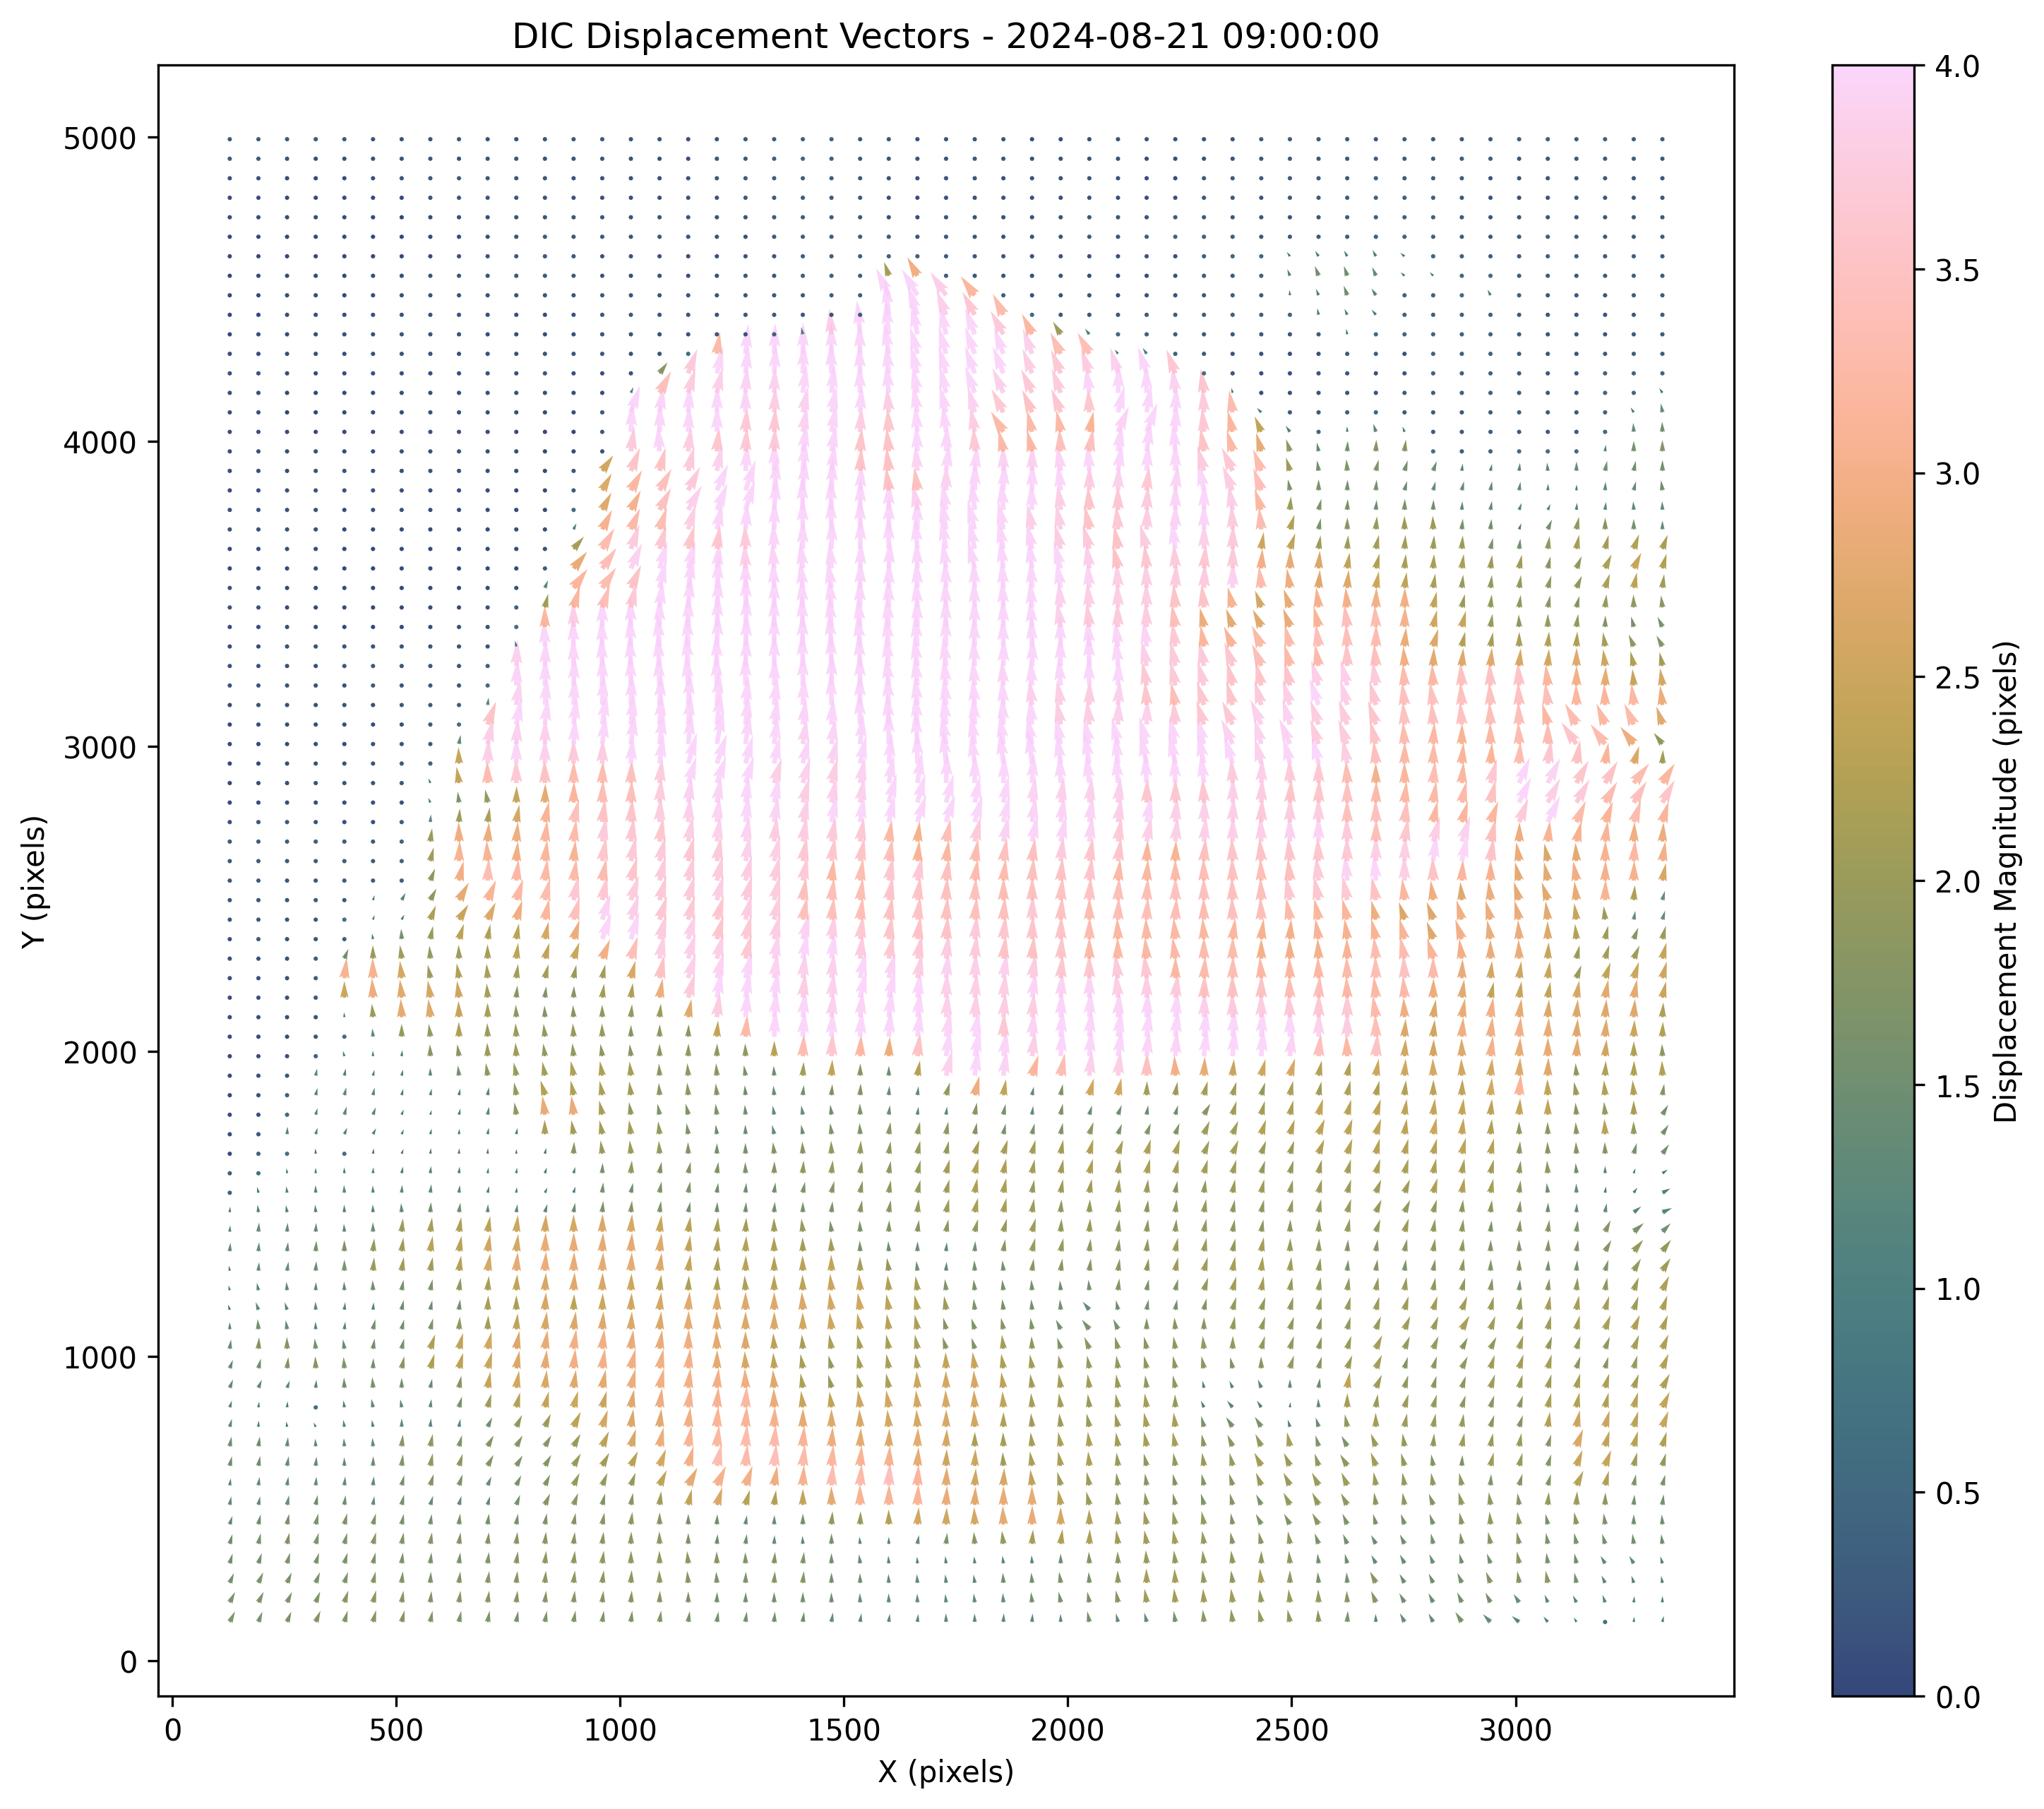

In [ ]:
target_date = "2024-08-23"
df = db.get_dic_data(target_date=target_date)
visualize_dic_dataframe(df, cmap_name="batlow", vmax=4.0, show=True)